# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')


In [2]:
#Изучим данные
pd.set_option('display.max_columns', None)
data.head()




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца.

Типы данных:
булевые bool(2)-studio,  open_plan
вещественные float64(14)-last_price,total_area,ceiling_height,floors_total,living_area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_nearest,ponds_nearest,days_exposition.
целочисленные int64(3)-total_images, rooms, floor
строки object(3)-locality_name,is_apartment,  first_day_exposition.

is_apartment  должен быть булев тип.
Замечены пропуски в столбцах:
ceiling_height()— высота потолков (м)
living_area — жилая площадь в квадратных метрах (м²)
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
balcony — число балконов

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении



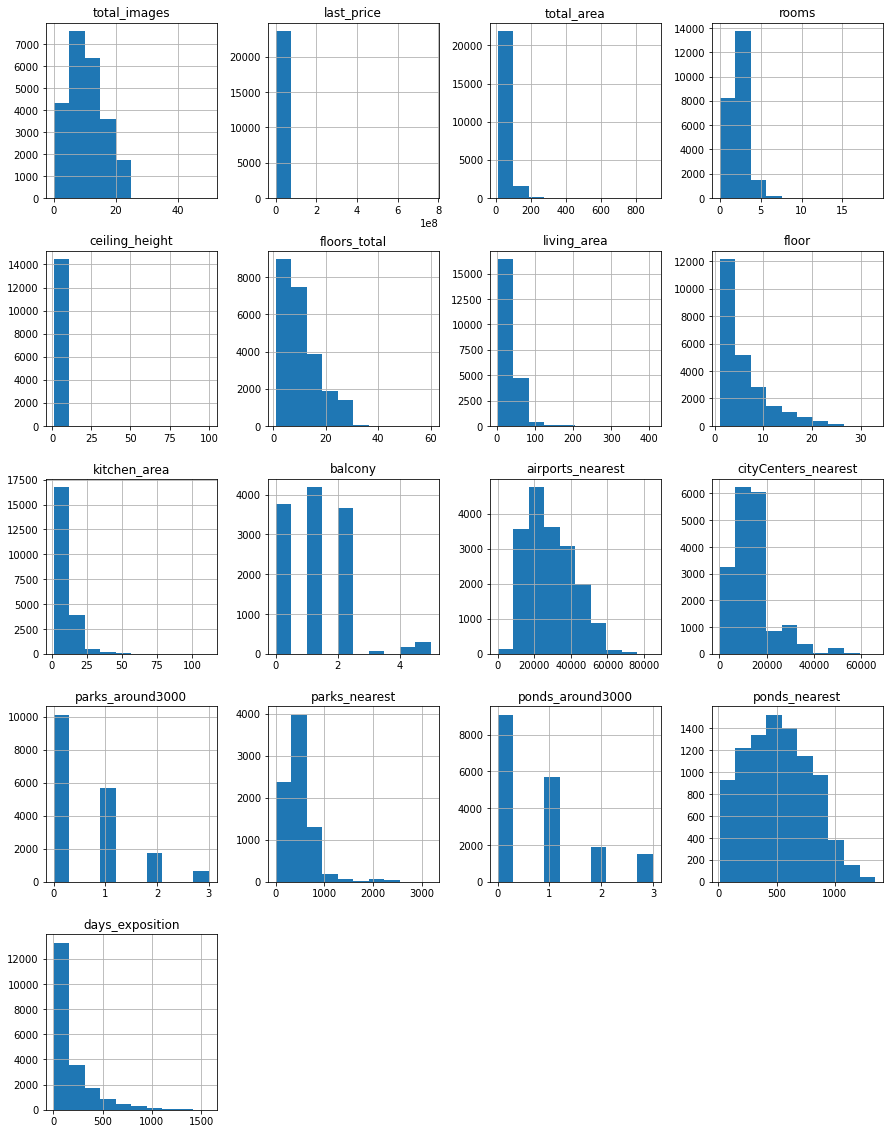

In [4]:
data.hist(figsize=(15, 20));

Вывод: В датасете 22 столбца.


### Предобработка данных

In [5]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,23699.0,NaN,NaN,NaN,9.858475,5.682529,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,NaN,NaN,NaN,6541548.771552,10887013.267545,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.348651,35.654083,12.0,40.0,52.0,69.9,900.0
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699.0,NaN,NaN,NaN,2.070636,1.078405,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,NaN,NaN,NaN,2.771499,1.261056,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,NaN,NaN,NaN,10.673824,6.597173,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,NaN,NaN,NaN,34.457852,22.030445,2.0,18.6,30.0,42.3,409.7
floor,23699.0,NaN,NaN,NaN,5.892358,4.885249,1.0,2.0,4.0,8.0,33.0
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN



####  Обработка "total_images" - число фотографий квартиры в объявлении



* Изучим значения


In [6]:

print('Null or Na count is', data["total_images"].isna().sum())
print(data["total_images"].describe())


Null or Na count is 0
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет
    - Изменений нет



* Изменение



####   Обработка "last_price"-цена на момент снятия с публикации


* Изучим значения

In [7]:
print('Null or Na count is', data["last_price"].isna().sum())
print(data["last_price"].describe())


Null or Na count is 0
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

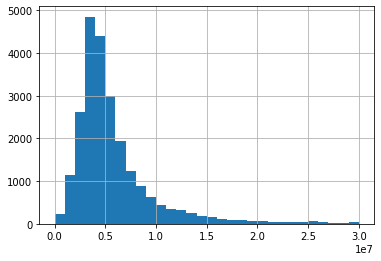

In [8]:
data['last_price'].hist(bins=30, range=(0, 30000000))

(0.0, 20000000.0)

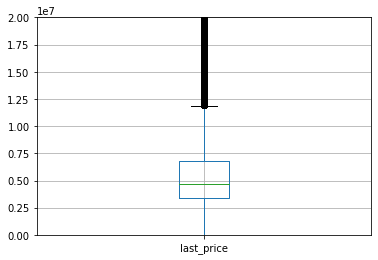

In [9]:
data.boxplot(column='last_price')

plt.ylim(0, 20000000)


In [10]:
data = data[(data['last_price'] <20000000)]
len(data)/23699

0.9694923836448796


* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет
    - Удалены выбивающиеся значения



####  Обработка "total_area"-общая площадь квартиры в квадратных метрах


In [11]:

print('Null or Na count is', data["total_area"].isna().sum())
print(data["total_area"].describe())



Null or Na count is 0
count    22976.000000
mean        56.678310
std         24.610861
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        320.000000
Name: total_area, dtype: float64



* Вывод
	- Обнаруженные аномалии:достаточно большое стандартное отклонение. При средней площади 60, максимальное значение 900. Построим ящик с усами.
	- Пропусков:нет


<AxesSubplot:>

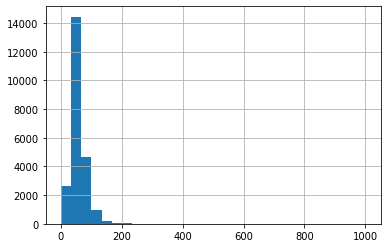

In [12]:
data['total_area'].hist(bins=30, range=(0, 1000))



(0.0, 900.0)

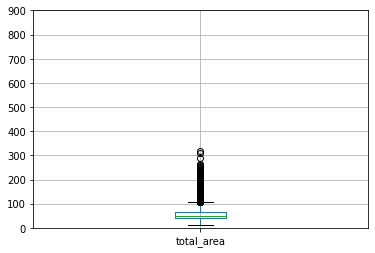

In [13]:
data.boxplot(column='total_area')
plt.ylim(0, 900)



In [14]:
data = data[(data['total_area'] <200)]
len(data)

22933

####  Обработка "first_day_exposition"-дата публикации

* Изучим значения


In [15]:

print('Null or Na count is', data["first_day_exposition"].isna().sum())
print(data["first_day_exposition"].describe())

Null or Na count is 0
count                   22933
unique                   1487
top       2018-02-01T00:00:00
freq                      360
Name: first_day_exposition, dtype: object



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков:нет
    
  
    - Финальный тип и почему: Приведем данные к формату datetime, для того чтобы можно проводить операции с датой.
    



In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   
5             NaN          12.0         14.4      5          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      NaN            Сан

####  Обработка "rooms"-число комнат


* Изучим значения


In [17]:

print('Null or Na count is', data["rooms"].isna().sum())
print(data["rooms"].describe())


Null or Na count is 0
count    22933.000000
mean         2.002311
std          0.969464
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет


<AxesSubplot:>

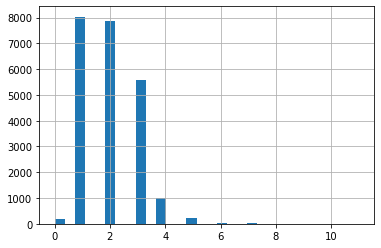

In [18]:
data['rooms'].hist(bins=30, range=(0, 11))


(0.0, 11.0)

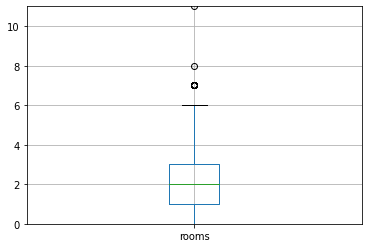

In [19]:
#построим ящик с усами
data.boxplot(column='rooms')
plt.ylim(0, 11)

In [20]:
#оставим строки по размаху до 6 комнат
data = data[(data['rooms'] <6)]
len(data)

22868

####  Обработка "ceiling_height	"-высота потолков в метрах


* Изучим значения


In [21]:

print('Null or Na count is', data["ceiling_height"].isna().sum())
print(data["ceiling_height"].describe())


Null or Na count is 8932
count    13936.000000
mean         2.754049
std          1.280628
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



* Вывод
	- Обнаруженные аномалии:высота потолков средняя 2,77м, максимальное-100м. В Санкт-Петербурге есть дома с высотой потолков 5 м, но это всего 36 значений, стандартная высота потолков в новостройках 2,8 м. Поэтому заменим пропуски средним значением.
	- Пропусков 9195.
    

In [22]:
#проверим количество аномальных занчений
df=data.query('ceiling_height<2.5')
df['ceiling_height'].count() 
#36 значений >5м, 1529значений >3м, 73значения<2.5m

73

In [23]:
data["ceiling_height"]=data["ceiling_height"].where(data["ceiling_height"]<3, other=2.77)

In [24]:

print('Null or Na count is', data["ceiling_height"].isna().sum())
print(data["ceiling_height"].describe())



Null or Na count is 0
count    22868.000000
mean         2.692939
std          0.112855
min          1.000000
25%          2.600000
50%          2.770000
75%          2.770000
max          2.990000
Name: ceiling_height, dtype: float64


####  Обработка "floors_total"-всего этажей в доме


* Изучим значения


In [25]:

print('Null or Na count is', data["floors_total"].isna().sum())
print(data["floors_total"].describe())


Null or Na count is 83
count    22785.000000
mean        10.759754
std          6.636639
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 86
    


In [26]:
print(data["floors_total"].describe())

count    22785.000000
mean        10.759754
std          6.636639
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


####  Обработка "living_area"-жилая площадь в квадратных метрах


* Изучим значения


In [27]:

print('Null or Na count is', data["living_area"].isna().sum())
print(data["living_area"].describe())


Null or Na count is 1799
count    21069.000000
mean        32.121826
std         15.450495
min          2.000000
25%         18.400000
50%         30.000000
75%         41.000000
max        145.400000
Name: living_area, dtype: float64



* Вывод
	- Обнаруженные аномалии:минимальное и максимальное значения.
	- Пропусков 1903.
  


<AxesSubplot:>

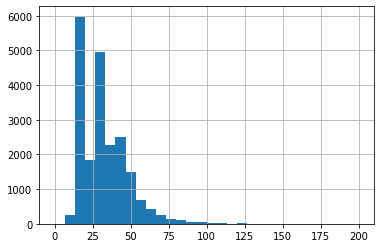

In [28]:
data['living_area'].hist(bins=30, range=(0, 200))

(0.0, 400.0)

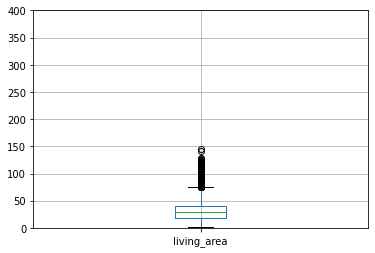

In [29]:
data.boxplot('living_area')
plt.ylim(0, 400)



In [30]:
#проверка

print('Null or Na count is', data["living_area"].isna().sum())
print(data["living_area"].describe())

Null or Na count is 1799
count    21069.000000
mean        32.121826
std         15.450495
min          2.000000
25%         18.400000
50%         30.000000
75%         41.000000
max        145.400000
Name: living_area, dtype: float64


####  Обработка "floor"-этаж


* Изучим значения


In [31]:

print('Null or Na count is', data["floor"].isna().sum())
print(data["floor"].describe())


Null or Na count is 0
count    22868.000000
mean         5.903402
std          4.906212
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет


####  Обработка "is_apartment"-апартаменты(булев тип)


* Изучим значения


In [32]:

print('Null or Na count is', data["is_apartment"].isna().sum())
print(data["is_apartment"].describe())


Null or Na count is 20186
count      2682
unique        2
top       False
freq       2640
Name: is_apartment, dtype: object


In [33]:
print(data["is_apartment"].value_counts())

False    2640
True       42
Name: is_apartment, dtype: int64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 20924. Заполним пропуски 0(False).
    - Поменяем тип данных на булев



In [34]:

data['is_apartment'] = data['is_apartment'].fillna(False)

In [35]:
#проверка:
print(data["is_apartment"].value_counts())
len(data["is_apartment"])

False    22826
True        42
Name: is_apartment, dtype: int64


22868

In [36]:
# меняем на булев тип 
data['is_apartment'] = data['is_apartment'].astype(bool)

In [37]:
print(data["is_apartment"].describe())

count     22868
unique        2
top       False
freq      22826
Name: is_apartment, dtype: object


####  Обработка "studio"-квартира - студия (булев тип)


* Изучим значения


In [38]:

print('Null or Na count is', data["studio"].isna().sum())
print(data["studio"].describe())


Null or Na count is 0
count     22868
unique        2
top       False
freq      22719
Name: studio, dtype: object



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет
    - Приведем данные к типу булев


In [39]:
data['studio'] = data['studio'].astype(bool)

####  Обработка "open_plan"-свободная планировка(булев тип)


* Изучим значения


In [40]:

print('Null or Na count is', data["open_plan"].isna().sum())
print(data["open_plan"].describe())


Null or Na count is 0
count     22868
unique        2
top       False
freq      22803
Name: open_plan, dtype: object



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков нет


####  Обработка "kitchen_area"-площадь кухни в квадратных метрах


* Изучим значения


In [41]:

print('Null or Na count is', data["kitchen_area"].isna().sum())
print(data["kitchen_area"].describe())


Null or Na count is 2186
count    20682.000000
mean        10.074012
std          4.635552
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64



* Вывод
	- Обнаруженные аномалии:Есть слишком маленькая площадь кухни.
	- Пропусков 2778


<AxesSubplot:>

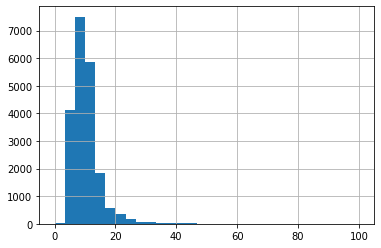

In [42]:
data['kitchen_area'].hist(bins=30, range=(0, 100))

In [43]:
#заменим пропуски на среднее 


data['kitchen_area'].fillna(data['kitchen_area'].mean())

0        25.000000
1        11.000000
2         8.300000
4        41.000000
5         9.100000
           ...    
23694    13.830000
23695     8.500000
23696    10.074012
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 22868, dtype: float64

In [44]:
#проверка
print('Null or Na count is', data["kitchen_area"].isna().sum())
print(data["kitchen_area"].describe())

Null or Na count is 2186
count    20682.000000
mean        10.074012
std          4.635552
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64


####  Обработка "balcony"-число балконов


* Изучим значения


In [45]:

print('Null or Na count is', data["balcony"].isna().sum())
print(data["balcony"].describe())


Null or Na count is 11045
count    11823.000000
mean         1.151484
std          1.063525
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 11519
    - изменим тип на целочисленный.
    - Заменим пропуски на 0.


In [46]:
data['balcony'] = data['balcony'].fillna(0)

In [47]:
#изменим тип данных на int

data['balcony'] = data['balcony'].astype(int)

In [48]:
#проверка
print('Null or Na count is', data["balcony"].isna().sum())
print(data["balcony"].describe())

Null or Na count is 0
count    22868.000000
mean         0.595330
std          0.957011
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


####  Обработка "locality_name"-название населенного пункта


* Изучим значения


In [49]:

print('Null or Na count is', data["locality_name"].isna().sum())
print(data["locality_name"].describe())


Null or Na count is 48
count               22820
unique                363
top       Санкт-Петербург
freq                14921
Name: locality_name, dtype: object



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 49. Удалим строки с пропущенными значениями.
    - Проверим на уникальность.


In [50]:
data=data.dropna(subset=['locality_name'])

In [51]:
print('Null or Na count is', data["locality_name"].isna().sum())
print(data["locality_name"].describe())

Null or Na count is 0
count               22820
unique                363
top       Санкт-Петербург
freq                14921
Name: locality_name, dtype: object


In [52]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [53]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')                                                       
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок') 
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

####  Обработка "airports_nearest"-расстояние до ближайшего аэропорта в метрах


* Изучим значения


In [54]:

print('Null or Na count is', data["airports_nearest"].isna().sum())
print(data["airports_nearest"].describe())


Null or Na count is 5508
count    17312.000000
mean     28883.027842
std      12819.995425
min          0.000000
25%      18397.500000
50%      26932.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 5534


####  Обработка "cityCenters_nearest"-расстояние до центра города в метрах


* Изучим значения


In [55]:

print('Null or Na count is', data["cityCenters_nearest"].isna().sum())
print(data["cityCenters_nearest"].describe())


Null or Na count is 5491
count    17329.000000
mean     14549.295401
std       8562.365724
min        208.000000
25%       9894.000000
50%      13307.000000
75%      16470.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 5511


####  Обработка "parks_around3000"-число парков в радиусе 3 километра


* Изучим значения


In [56]:

print('Null or Na count is', data["parks_around3000"].isna().sum())
print(data["parks_around3000"].describe())


Null or Na count is 5490
count    17330.000000
mean         0.582458
std          0.778434
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 5510


In [57]:
#Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [58]:
# Приводим в целочисленный тип количество парков. 
data['parks_around3000'] = data['parks_around3000'].astype(int)


####  Обработка "parks_nearest"-расстояние до ближайшего парка в метрах


* Изучим значения


In [59]:

print('Null or Na count is', data["parks_nearest"].isna().sum())
print(data["parks_nearest"].describe())


Null or Na count is 15340
count    7480.000000
mean      494.550936
std       343.053352
min         1.000000
25%       289.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 15586


####  Обработка "ponds_around3000"-число водоемов в радиусе 3 км


* Изучим значения


In [60]:

print('Null or Na count is', data["ponds_around3000"].isna().sum())
print(data["ponds_around3000"].describe())


Null or Na count is 5490
count    17330.000000
mean         0.739123
std          0.915987
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 5510
    


In [61]:
#Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [62]:
# Приводим в целочисленный тип количество парков. 
data['ponds_around3000'] = data['ponds_around3000'].astype(int)



####  Обработка "ponds_nearest"-расстояние до ближайшего водоема в метрах


* Изучим значения


In [63]:

print('Null or Na count is', data["ponds_nearest"].isna().sum())
print(data["ponds_nearest"].describe())


Null or Na count is 14325
count    8495.000000
mean      525.171984
std       277.438299
min        13.000000
25%       303.000000
50%       510.000000
75%       735.000000
max      1344.000000
Name: ponds_nearest, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 14565


####  Обработка "days_exposition"-сколько дней было размещено объявление (от публикации до снятия)


* Изучим значения


In [64]:

print('Null or Na count is', data["days_exposition"].isna().sum())
print(data["days_exposition"].describe())


Null or Na count is 2948
count    19872.000000
mean       177.312248
std        216.026818
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64



* Вывод
	- Обнаруженные аномалии:нет
	- Пропусков 3180


<div>

	new_data.shape[0] / old_data.shape[0]
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [65]:
# добавляем столбец с ценой квадратного метра 
data['price_m'] = data['last_price'] / data['total_area']
print(data['price_m'].head())

print(data.head())

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_m, dtype: float64
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.77          11.0         18.6      1         False   False   
2            2.77           5.0         34.3      4         False   False   
4            2.77          14.0         32.0     13         False   False   
5            2.77          12.0         14.4      5         Fal

In [66]:
# добавляем столбец день недели
data['day_week'] = data['first_day_exposition'].dt.weekday
#столбец с месяцем публикации
data['month'] = data['first_day_exposition'].dt.month
#столбец с годом публикации
data['year'] = data['first_day_exposition'].dt.year
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.77          11.0         18.6      1         False   False   
2            2.77           5.0         34.3      4         False   False   
4            2.77          14.0         32.0     13         False   False   
5            2.77          12.0         14.4      5         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0        0         

In [67]:
#добавляем в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_floor(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    




In [ ]:
data['floor_type'] = data.apply(type_floor, axis=1)

In [69]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day_week,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.77,11.0,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.77,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,2.77,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.77,12.0,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.77,26.0,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.77,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.77,27.0,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой


In [70]:
# добавляем столбец расстояние в км до центра города
print(data['cityCenters_nearest'].head())
data['centre_km']=data['cityCenters_nearest']/1000
data['centre_km']=data['centre_km'].round()
print(data.head())

0    16028.0
1    18603.0
2    13933.0
4     8098.0
5        NaN
Name: cityCenters_nearest, dtype: float64
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.77          11.0         18.6      1         False   False   
2            2.77           5.0         34.3      4         False   False   
4            2.77          14.0         32.0     13         False   False   
5            2.77          12.0         14.4      5         False   False   

   

### Проведите исследовательский анализ данных

In [71]:
#Посчитаем соотношение жилой и общей площади в %
data['living_total_ratio'] = data['living_area']/data['total_area']*100
#Посчитаем соотношение площади кухни и общей площади в %
data['kitchen_total_ratio'] = data['kitchen_area']/data['total_area']*100
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day_week,month,year,floor_type,centre_km,living_total_ratio,kitchen_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0,47.222222,23.148148
1,7,3350000.0,40.4,2018-12-04,1,2.77,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0,46.039604,27.227723
2,10,5196000.0,56.0,2015-08-20,2,2.77,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0,61.250000,14.821429
4,2,10000000.0,100.0,2018-06-19,2,2.77,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0,32.000000,41.000000
5,10,2890000.0,30.4,2018-09-10,1,2.77,12.0,14.4,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN,47.368421,29.934211


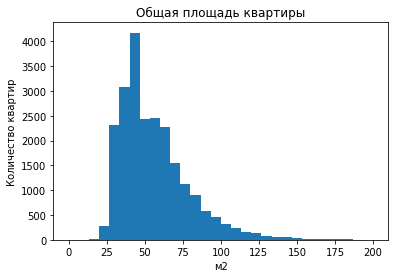

In [72]:
# Исследуем общую площадь квартир
plt.hist(data['total_area'], bins=30, range=(0,200))
plt.title('Общая площадь квартиры')
plt.xlabel('м2')
plt.ylabel('Количество квартир')
plt.show()




<AxesSubplot:>

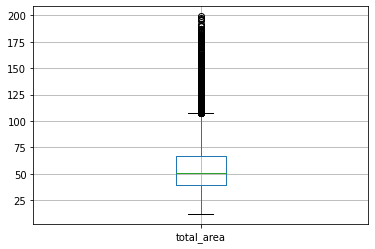

In [73]:
data.boxplot('total_area')


Исследование общей площади квартиры:
Большинство квартир около 50 метров кв.  

In [74]:
# Исследуем стоимость квартир


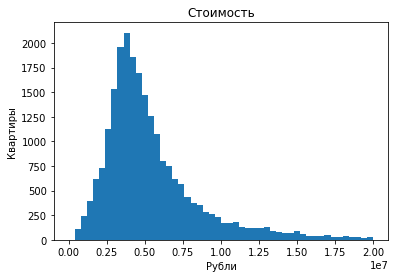

In [75]:

plt.hist(data['last_price'], bins=50, range=(0,20000000))
plt.title('Стоимость')
plt.xlabel('Рубли')
plt.ylabel('Квартиры')
plt.show()



<AxesSubplot:>

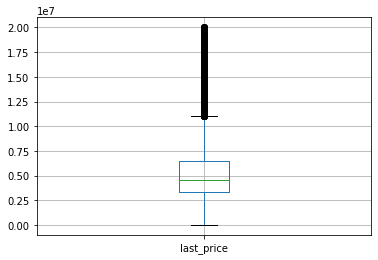

In [76]:
data.boxplot('last_price')

В основном стоимость квартир 2,5-10 млн.руб. От 10 млн малое количество квартир


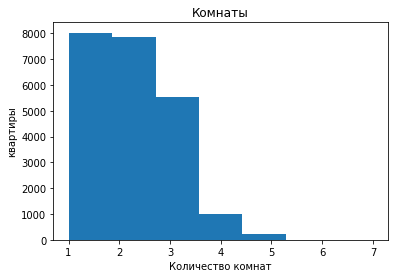

In [77]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('квартиры')
plt.show()





<AxesSubplot:>

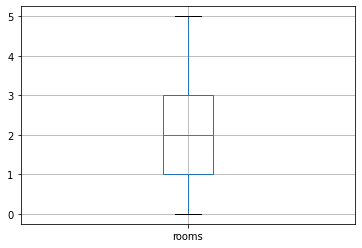

In [78]:
data.boxplot('rooms')

В основном квартиры 1-2 комнатные, чуть меньше доля 3-комнатных квартир. Далее резкое снижение начиная с 4-комнатных квартир. 


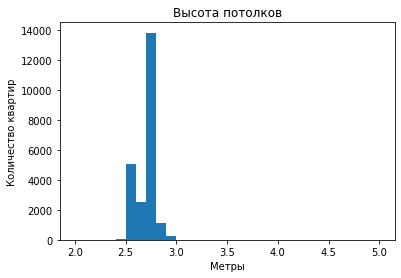

In [79]:
# Исследуем высоту потолков

plt.hist(data['ceiling_height'], bins=30, range=(2,5))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()



<AxesSubplot:>

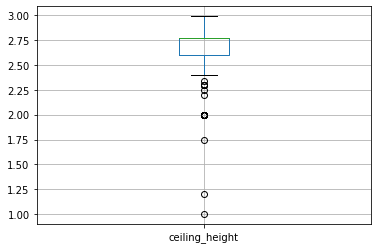

In [80]:
data.boxplot('ceiling_height')

Большинство квартир имеют высоту потолков от 2,5 - 3 метра. В Санкт-Петербурге есть дома с высотой потолков до 5 м, если больше  высота потолков выглядит подозрительно. По ящику с усами выбросами можно считать, что не входит в промежуток 2,35-3м

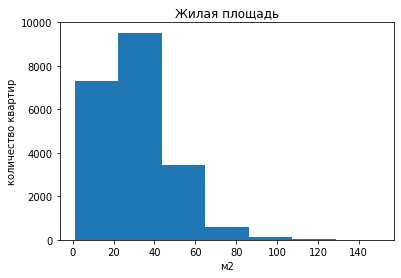

In [81]:
# Исследуем жилую площадь
plt.hist(data['living_area'], bins=7, range=(1,150))
plt.title('Жилая площадь')
plt.xlabel('м2')
plt.ylabel('количество квартир')
plt.show()

<AxesSubplot:>

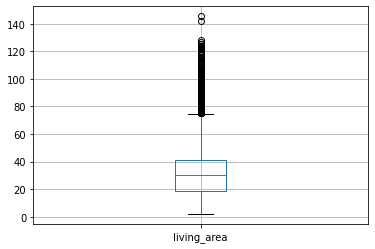

In [82]:
data.boxplot('living_area')


Жилая площадь большинства квартир до 40 м.кв. 

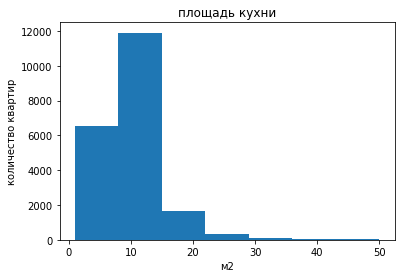

In [83]:
# Исследуем площадь кухни
plt.hist(data['kitchen_area'], bins=7, range=(1,50))
plt.title('площадь кухни')
plt.xlabel('м2')
plt.ylabel('количество квартир')
plt.show()

<AxesSubplot:>

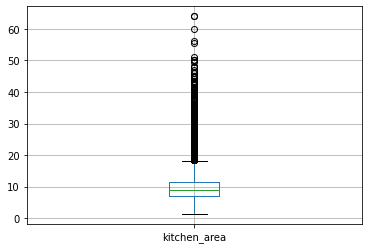

In [84]:
data.boxplot('kitchen_area')


В основном площадь кухни до 15 м2

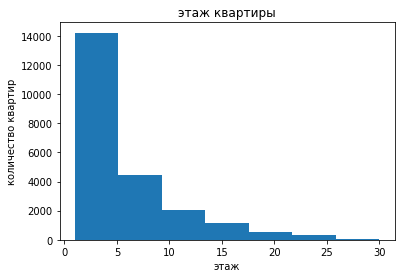

In [85]:
# Исследуем этаж квартиры
plt.hist(data['floor'], bins=7, range=(1,30))
plt.title('этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('количество квартир')
plt.show()

<AxesSubplot:>

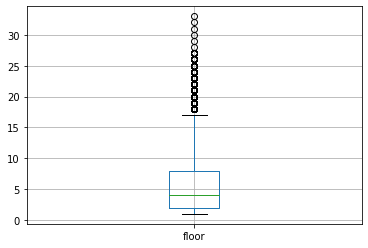

In [86]:
data.boxplot('floor')

Большинство квартир до 5 этажа, далее количество квартир снижается 5-30 этаж

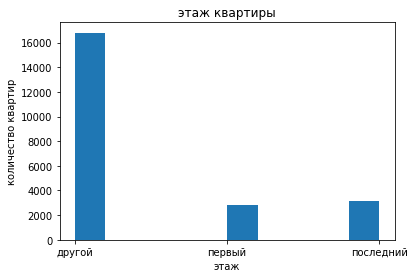

In [87]:
# Исследуем тип этажа квартиры

plt.hist(data['floor_type'], bins=10)
plt.title('этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('количество квартир')
plt.show()

Квартир на 1 и последнем этажах меньше, лидируют другие этажи

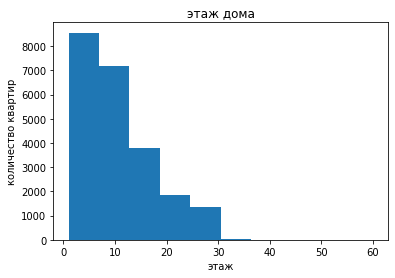

In [88]:
# Исследуем количество этажей в домах

plt.hist(data['floors_total'], bins=10)
plt.title('этаж дома')
plt.xlabel('этаж')
plt.ylabel('количество квартир')
plt.show()

<AxesSubplot:>

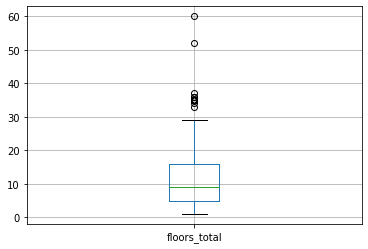

In [89]:
data.boxplot('floors_total')

Большое количество квартир до 12 этажа

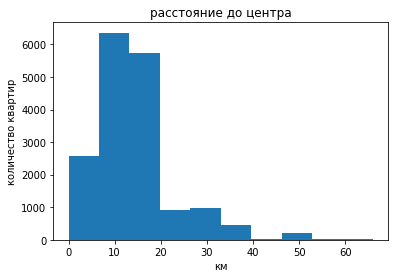

In [90]:
# Исследуем расстояние до центра города в км

plt.hist(data['centre_km'], bins=10)
plt.title('расстояние до центра')
plt.xlabel('км')
plt.ylabel('количество квартир')
plt.show()

<AxesSubplot:>

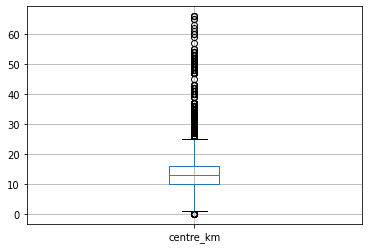

In [91]:
data.boxplot('centre_km')

Большее количество квартир с удаленностью  8-20 км от центра города

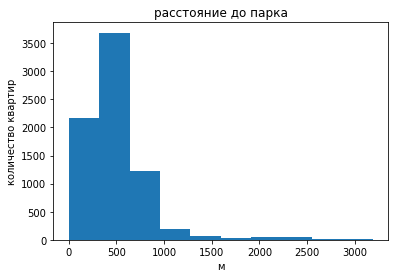

In [92]:
# Исследуем расстояние до ближайшего парка

plt.hist(data['parks_nearest'], bins=10)
plt.title('расстояние до парка')
plt.xlabel('м')
plt.ylabel('количество квартир')
plt.show()

Большинство квартир аходится на расстоянии до 1км от парка

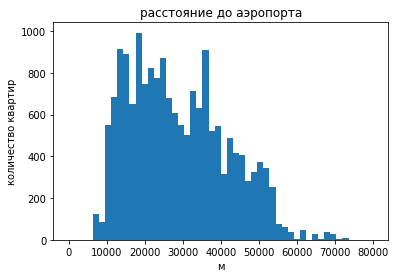

In [93]:
#расстояние до ближайшего аэропорта

plt.hist(data['airports_nearest'], bins=50, range=(0,80000))
plt.title('расстояние до аэропорта')
plt.xlabel('м')
plt.ylabel('количество квартир')
plt.show()

В основном удаленность от аэропорта 10-50 км

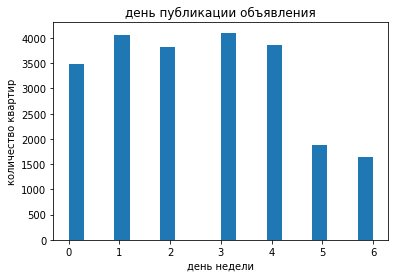

In [94]:
#день публикации объявления


plt.hist(data['day_week'], bins=20, range=(0,6))
plt.title('день публикации объявления')
plt.xlabel('день недели')
plt.ylabel('количество квартир')
plt.show()

Больше публикаций объявлений с понедельника по пятницу, в выходные заметно ниже

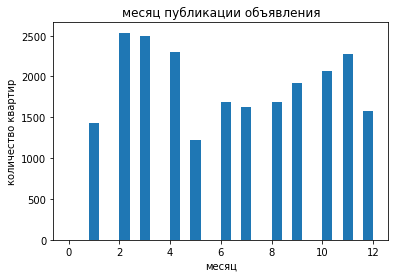

In [95]:
#месяц публикации объявления


plt.hist(data['month'], bins=30, range=(0,12))
plt.title('месяц публикации объявления')
plt.xlabel('месяц')
plt.ylabel('количество квартир')
plt.show()

Больше объявлений поданных в феврале, марте,апреле,октябре, ноябре. А в январе,мае,декабре заметно меньше.

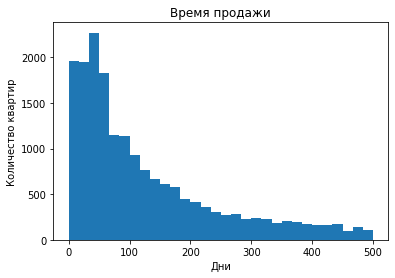

count    19872.000000
mean       177.312248
std        216.026818
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

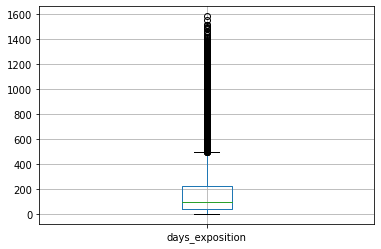

In [96]:

#  Изучение времени продажи квартиры
plt.hist(data['days_exposition'], bins=30, range=(0,500))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('days_exposition')
data['days_exposition'].describe()

Вывод:

Время продажи по медиане 93 дня. Среднее (mean)время продажи 177 дней.
Большое число квартир, продается до 60 дней(2 пика продаж на 45 день и 60 день). А также есть варианты, которые продавались много месяцев.
Быстрой продажей можно считать 44 дней, долгой более 226 дней.



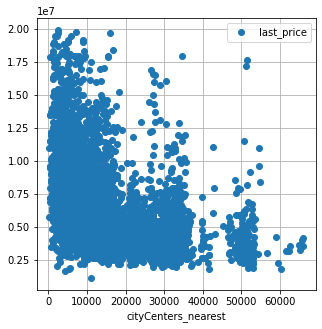

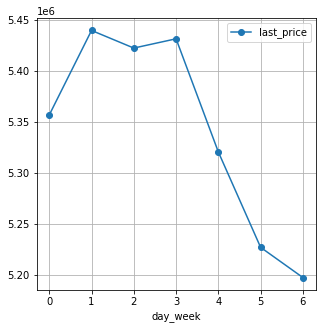

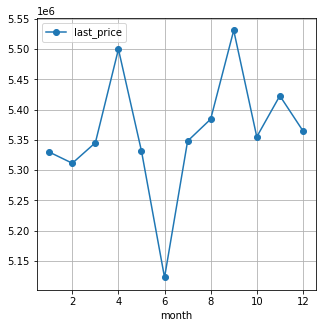

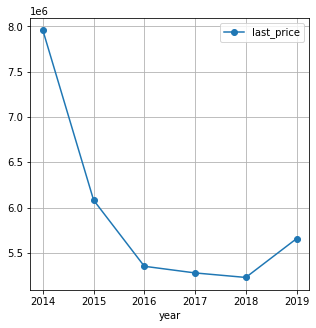

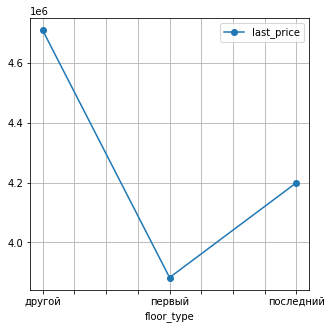

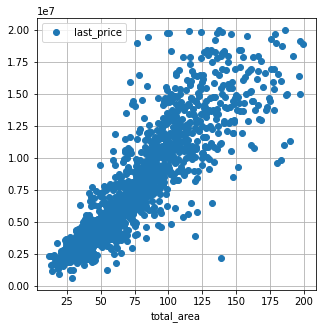

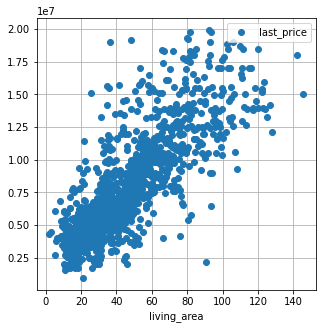

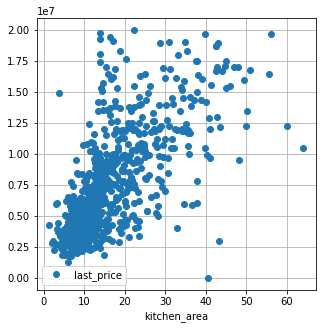

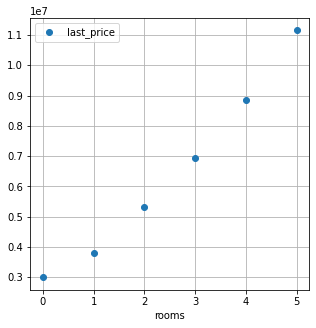

In [97]:
#Исследуем какие факторы влияют на стоимость

# Цена & удалённость от центра
data.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
# Цена &  день публикации
data.pivot_table(index='day_week', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
# Цена &  месяц публикации   
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
# Цена &  год публикации   
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
# Цена &  этаж
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
#Цена &  общая площадь
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
#Цена &  жилая площадь
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
#Цена &  площадь кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
#Цена &  количество комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()



Чем ближе к центру тем, квартиры становятся дороже. Но в центре можно найти и средние, и дешевые варианты жилья.
Первый этаж значительно дешевле по цене, чем остальные. На втором месте идет последний этаж. Обычно люди предпочитают жить не на 1 и не на последнем этажах, поэтому выше стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
Зависимость цены от даты: дороже всего квартиры, опубликованные во вторник и четверг, дешевле всего - в выходные.
Если рассмотреть по месяцам дороже всего квартиры, продающиеся в апреле и сентябре, дешевле всего - в июне.
Рассмотрим цены по годам, самые дорогие были в 2014 году, затем до 2018 года был спад цен на недвижимость,а в 2019 году цены снова стали подниматься.
И конечно, цена зависит от площади. Чем больше площадь, тем выше стоимость.
Число комнат влияет на цену больше комнат - больше цена


In [98]:
#Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
city_top = data['locality_name'].value_counts().head(10)
print(city_top)
city_10=['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
city_qv = data.query('locality_name in @city_10').pivot_table(index='locality_name', values='price_m')

city_qv.sort_values('price_m', ascending=False)

Санкт-Петербург      14921
поселок Мурино         556
поселок Шушары         440
Всеволожск             397
Пушкин                 358
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


,price_m
locality_name,
Санкт-Петербург,108749.367113
Пушкин,101956.176763
деревня Кудрово,92473.547576
поселок Парголово,90332.263023
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75333.295801
Гатчина,68746.146763
Всеволожск,67214.252635


Самая большая цена за кв.м в Санкт-Петербурге и ближайших окрестностях, пониже цена во Всеволжске и Выборге (но и они находятся удаленнее от Санкт-Петербурга)

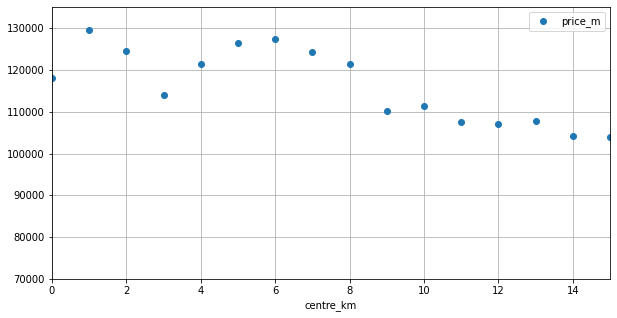

In [99]:
#как стоимость объектов зависит от расстояния до центра города

data.query('locality_name == "Санкт-Петербург"').pivot_table(index='centre_km', values='price_m').plot(grid=True, style='o', xlim=(0,15), figsize=(10, 5))

plt.show()



Переходная точка 9км, цена начинает снижаться.

### Общий вывод

Вывод: Целью исследования было выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Входные данные от сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.
В ходе исследования было сделано:
1. Предобработка данных
2. Исследовательский анализ данных
a) изучены следующие параметры объектов: общая площадь;жилая площадь;площадь кухни;цена объекта;количество комнат;высота потолков;этаж квартиры;тип этажа квартиры («первый», «последний», «другой»);общее количество этажей в доме;расстояние до центра города в метрах;расстояние до ближайшего аэропорта;расстояние до ближайшего парка;день и месяц публикации объявления.Построены отдельные гистограммы для каждого из этих параметров.

б) Исследовано, как быстро продавались квартиры, сколько времени обычно занимает продажа, какие продажи можно считать быстрыми, а какие — необычно долгими.
 
в) Проведено исследование какие факторы больше всего влияют на общую (полную) стоимость объекта?
 
г) Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

д) Исследовано как стоимость объектов зависит от расстояния до центра города.



Результаты показали: 

Исследование площади квартиры: большинство квартир около 50 м2. Жилая площадь большинства квартир до 40 м2,
площадь кухни до 15 м2. Большинство квартир имеют высоту потолков 2,5 - 3 метра.
В основном стоимость квартир 2,5-10 млн.руб. От 10 млн количество квартир уменьшается.
Продаются в основном квартиры 1-2 комнатные, чуть меньше доля 3-комнатных квартир. Далее резкое снижение начиная с 4-комнатных.
Большое количество продаваемых квартир до 5 этажа, далее количество квартир снижается (5-30 этаж)
Квартир на 1 и последнем этажах меньше, лидируют другие этажи(большинство квартир до 12 этажа).
Большинство квартир аходится на расстоянии до 1км от парка, 8-20 км от центра города, от аэропорта 10-50 км.

Больше публикаций объявлений с понедельника по пятницу, в выходные заметно ниже.
В течении года больше публикаций о продаже в феврале, марте,апреле,октябре, ноябре, а в январе,мае,декабре заметно меньше.


В среднем квартиры продаются от 93 дней - 177 дней. Большое число квартир, продается до 60 дней. А также есть варианты, которые продавались много месяцев. Быстрой продажей можно считать 44 дней, долгой более 226 дня.

На стоимость больше всего влияют площадь квартиры, удаленность от центра, этаж.
Первый этаж значительно дешевле по цене, чем остальные. Обычно люди предпочитают жить не на 1 и не на последнем этажах, поэтому выше стоимость у квартир, расположенных не на 1-м и не на последнем этажах.
По близости к центру можно сказать, что квартиры становятся дороже(примерно в радиусе 8-10км от центра).Но в центре можно найти и средние, и дешевые варианты жилья.
Зависимость цены от даты: дороже всего квартиры, опубликованные во вторник и четверг, дешевле всего - в выходные. Если рассмотреть по месяцам дороже всего квартиры, продающиеся в апреле и сентябре, дешевле всего - в июне. 
самые дорогие были в 2014 году, затем до 2018 года был спад цен на недвижимость,а в 2019 году цены снова стали подниматься
 
Самая большая цена за кв.м в Санкт-Петербурге и ближайших окрестностях, пониже цена во Всеволжске и Выборге (но и они находятся удаленнее от Санкт-Петербурга). Квадратный метр в Санкт-Петербурге - 114848руб



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод